In [2]:
import h5py

file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval_TaskD.h5'

try:
    with h5py.File(file_path, 'r') as f:
        print("File opened successfully.")
        def print_structure(name, obj):
            print(name)
        f.visititems(print_structure)
except Exception as e:
    print(f"Error opening file: {e}")


File opened successfully.
Bibliography
Bibliography/bibtex
Bibliography/short_form
ModelParameters
ModelParameters/Chemistry
ModelParameters/Chemistry/C2H2
ModelParameters/Chemistry/C2H2/gas_type
ModelParameters/Chemistry/C2H2/mix_ratio
ModelParameters/Chemistry/C2H2/molecule_name
ModelParameters/Chemistry/CH4
ModelParameters/Chemistry/CH4/gas_type
ModelParameters/Chemistry/CH4/mix_ratio
ModelParameters/Chemistry/CH4/molecule_name
ModelParameters/Chemistry/CO2
ModelParameters/Chemistry/CO2/gas_type
ModelParameters/Chemistry/CO2/mix_ratio
ModelParameters/Chemistry/CO2/molecule_name
ModelParameters/Chemistry/H2O
ModelParameters/Chemistry/H2O/gas_type
ModelParameters/Chemistry/H2O/mix_ratio
ModelParameters/Chemistry/H2O/molecule_name
ModelParameters/Chemistry/HCN
ModelParameters/Chemistry/HCN/gas_type
ModelParameters/Chemistry/HCN/mix_ratio
ModelParameters/Chemistry/HCN/molecule_name
ModelParameters/Chemistry/active_gases
ModelParameters/Chemistry/chemistry_type
ModelParameters/Chemistry/

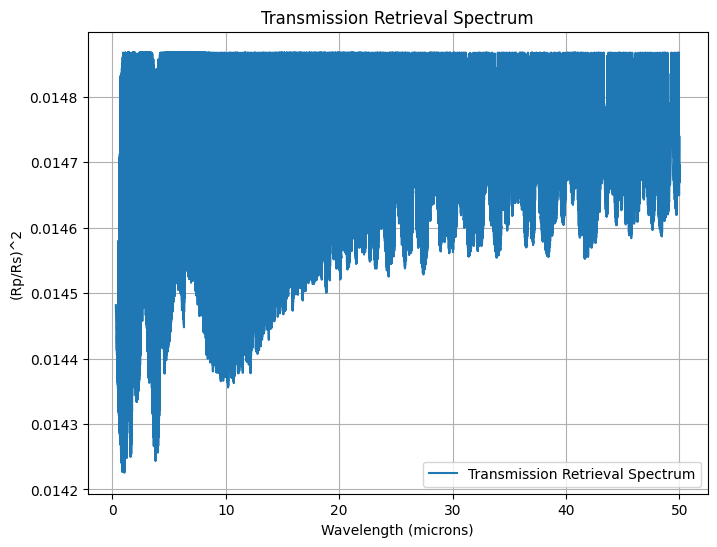

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval_TaskD.h5'



# Open the HDF5 file and extract data
with h5py.File(file_path, 'r') as f:
    # Extract wavelength and spectrum
    wavelength = f['Output/Solutions/solution0/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum = f['Output/Solutions/solution0/Spectra/native_spectrum'][:]  # Native spectrum

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(wavelength, spectrum, label='Transmission Retrieval Spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Retrieval Spectrum')
plt.legend()
plt.grid(True)
#plt.savefig('/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskC_spectrum.png')  # Save the plot
plt.show()


In [6]:
import h5py


with h5py.File(file_path, 'r') as f:
    # Extract Planet Radius
    planet_radius_mean = f['Output/Solutions/solution0/fit_params/planet_radius/mean'][()]
    planet_radius_error_p = f['Output/Solutions/solution0/fit_params/planet_radius/sigma_p'][()]
    planet_radius_error_m = f['Output/Solutions/solution0/fit_params/planet_radius/sigma_m'][()]

    # Extract Temperature
    temperature_mean = f['Output/Solutions/solution0/fit_params/T/mean'][()]
    temperature_error_p = f['Output/Solutions/solution0/fit_params/T/sigma_p'][()]
    temperature_error_m = f['Output/Solutions/solution0/fit_params/T/sigma_m'][()]

    # Extract H2O Abundance
    log_h2o_mean = f['Output/Solutions/solution0/fit_params/log_H2O/mean'][()]
    log_h2o_error_p = f['Output/Solutions/solution0/fit_params/log_H2O/sigma_p'][()]
    log_h2o_error_m = f['Output/Solutions/solution0/fit_params/log_H2O/sigma_m'][()]

    log_co2_mean = f['Output/Solutions/solution0/fit_params/log_CO2/mean'][()]
    log_co2_error_p = f['Output/Solutions/solution0/fit_params/log_CO2/sigma_p'][()]
    log_co2_error_m = f['Output/Solutions/solution0/fit_params/log_CO2/sigma_m'][()]

    # Convert log(H2O) to linear scale for abundance
    h2o_mean = 10 ** log_h2o_mean
    h2o_error_p = h2o_mean * (10 ** log_h2o_error_p - 1)
    h2o_error_m = h2o_mean * (1 - 10 ** log_h2o_error_m)

    co2_mean = 10 ** log_co2_mean
    co2_error_p = co2_mean * (10 ** log_co2_error_p - 1)
    co2_error_m = co2_mean * (1 - 10 ** log_co2_error_m)
    # Print results
    print(f"Planet Radius: {planet_radius_mean:.4f} +{planet_radius_error_p:.4f} -{planet_radius_error_m:.4f} Rj")
    print(f"Temperature: {temperature_mean:.2f} +{temperature_error_p:.2f} -{temperature_error_m:.2f} K")
    print(f"H2O Abundance: {h2o_mean:.2e} +{h2o_error_p:.2e} -{h2o_error_m:.2e}")
    print(f"CO2 Abundance: {co2_mean:.2e} +{co2_error_p:.2e} -{co2_error_m:.2e}")



Planet Radius: 1.3810 +0.0017 -0.0027 Rj
Temperature: 709.01 +46.21 -36.34 K
H2O Abundance: 4.20e-02 +7.10e-03 --8.52e-03
CO2 Abundance: 5.58e-06 +3.94e-06 --4.03e-06


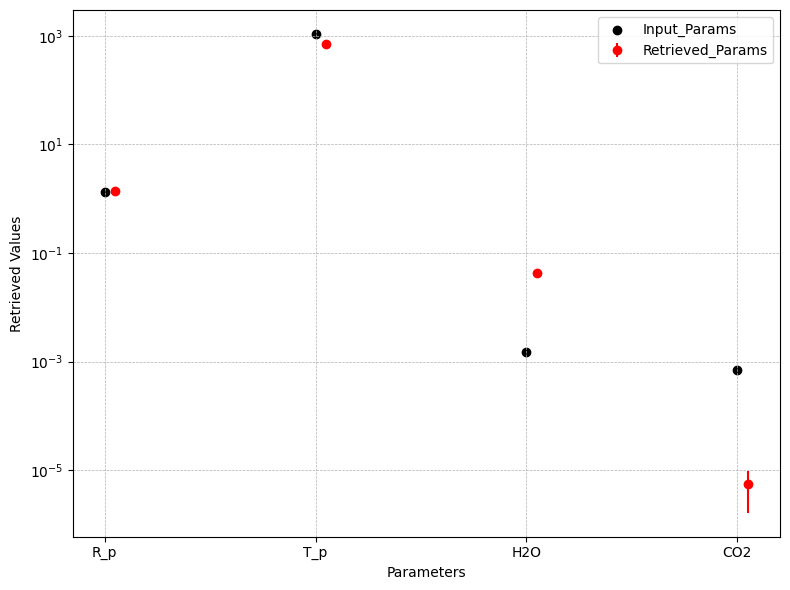

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
parameters = ['R_p', 'T_p', 'H2O', 'CO2']

# TauREx values and errors
Input_Params = [1.35, 1088, 1.5e-03, 7e-04]
#Input_errors = [[0.1, 0.01, 2, 1, 3, 0.00002],  # Negative errors
#                 [0.2, 0.02, 1.5, 2, 2, 0.00003]]  # Positive errors

# ExoGAN values and errors
Retrieved_Params = [1.3810, 709.01, 4.20e-02, 5.58e-06]
Retrieved_errors = [[0.0017, 46.21, 7.10e-03, 3.94e-06],  # Negative errors
                 [0.0027, 36.34, 8.52e-03, 4.03e-06]]  # Positive errors


# X-axis positions for each parameter
x_positions = np.arange(len(parameters))

# Create the plot
plt.figure(figsize=(8, 6))

# Plot TauREx data with error bars
plt.scatter(x_positions, Input_Params, color='black', label='Input_Params')
#plt.scatter(x_positions, Retrieved_Params, color='red', label='Retrieved_Params')


plt.errorbar(x_positions+ 0.05, Retrieved_Params, yerr=Retrieved_errors, fmt='o', color='red', label='Retrieved_Params')

# Customize x-axis
plt.xticks(x_positions, parameters)
plt.xlabel('Parameters')

# Logarithmic y-axis
plt.yscale('log')
plt.ylabel('Retrieved Values')

# Add legend
plt.legend()

# Show grid and plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



